In [1]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
pd.options.display.max_rows = 999

In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

In [3]:
titles = []
prices = []
m2s = []
locls = []
sizes = []

In [4]:
for i in range(60):
    url = "https://www.imovirtual.com/comprar/escritorio/lisboa/?search%5BCSRFToken%5D=be29230b3ccb4058a657f7eaaee5896602c909bc68fb7c8d8ad09678bc98cb06&CSRFToken=be29230b3ccb4058a657f7eaaee5896602c909bc68fb7c8d8ad09678bc98cb06&page=" + str(i+1) + "&search%5Bdescription%5D=1&search%5Border%5D=created_at_first%3Adesc"
    response = get(url, headers=headers)
    print(response)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    main_containers = html_soup.find_all('article', class_="offer-item")
    for cont in main_containers:
        #title
        title = cont.find_all('span', class_="offer-item-title")[0].text
        titles.append(title)

        #price
        price = cont.find_all('li', class_="offer-item-price")[0].text
        price = price.replace('\n', '')
        price = price.strip(' ')
        prices.append(price)

        #size
        size = cont.find_all('li', class_="hidden-xs offer-item-area")[0].text
        sizes.append(size)

        #m2
        r_price_size = cont.find_all('li', class_="offer-item-price-per-m")[0].text
        m2s.append(r_price_size)

        #local
        local = cont.find_all('p', class_="text-nowrap")[0].text
        local = local.split(":")
        local = local[1].split(",")
        local = local[0]
        locls.append(local)

        time.sleep(1)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [5]:
cols = ['Title', 'Zone', 'Price', 'Size (m²)', 'm2/€']

df = pd.DataFrame({'Title': titles,
                           'Price': prices,
                           'Size (m²)': sizes,
                           'Zone': locls,
                           'm2/€': m2s})[cols]

In [6]:
df

,Title,Zone,Price,Size (m²),m2/€
0,Espaço Comercial no Centro de Arroios,Arroios,1 100 000 €,550 m²,2 000 €/m²
1,Excelente espaço comercial para escritórios ou...,Arroios,1 100 000 €,550 m²,2 000 €/m²
2,Escritório de luxo junto ao Cascaishopping,Alcabideche,600 000 €,250 m²,2 400 €/m²
3,Escritório Miraflores 70m2,Algés,110 000 €,71 m²,1 549 €/m²
4,Escritório - Odivelas,Odivelas,200 000 €,261 m²,766 €/m²
5,Loja de Vestuário - Trespasse - Arroios,Arroios,28 000 €,57 m²,491 €/m²
6,Excelente escritório no coração de Lisboa,Avenidas Novas,3 750 €,272 m²,14 €/m²
7,Escritório inserido num Centro Comercial no Al...,Oeiras e São Julião da Barra,85 000 €,80 m²,1 063 €/m²
8,Escritório no centro da Parede com 2 Pisos,Carcavelos e Parede,180 000 €,115 m²,1 565 €/m²
9,"Escritório em Sintra, Monte Abraão",Massamá e Monte Abraão,86 000 €,121 m²,711 €/m²


In [7]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('€').rstrip('€'))
df['Price'] = df['Price'].map(lambda x: "".join(x.split()))
df['Price'] = df['Price'].str.replace(',','.')

df['Size (m²)'] = df['Size (m²)'].map(lambda x: x.lstrip('m²').rstrip('m²'))
df['Size (m²)'] = df['Size (m²)'].map(lambda x: "".join(x.split()))
df['Size (m²)'] = df['Size (m²)'].str.replace(',','.')

df['m2/€'] = df['m2/€'].map(lambda x: x.lstrip('€/m²').rstrip('€/m²'))
df['m2/€'] = df['m2/€'].map(lambda x: "".join(x.split()))
df['m2/€'] = df['m2/€'].str.replace(',','.')

In [8]:
df = df.drop(['Title'], axis=1)

In [9]:
for col in cols[2:]:  # Iterate over chosen columns
    df[col] = pd.to_numeric(df[col])

In [10]:
df.describe()

,Price,Size (m²),m2/€
count,1.440000e+03,1440.000000,1.440000e+03
mean,5.023797e+05,325.824722,2.961958e+03
std,1.121102e+06,1029.702454,2.897058e+04
min,3.750000e+03,1.000000,7.000000e+00
25%,1.278500e+05,69.000000,1.099000e+03
50%,2.317000e+05,121.000000,1.807000e+03
75%,4.550000e+05,252.000000,2.983250e+03
max,1.350000e+07,22100.000000,1.100000e+06


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


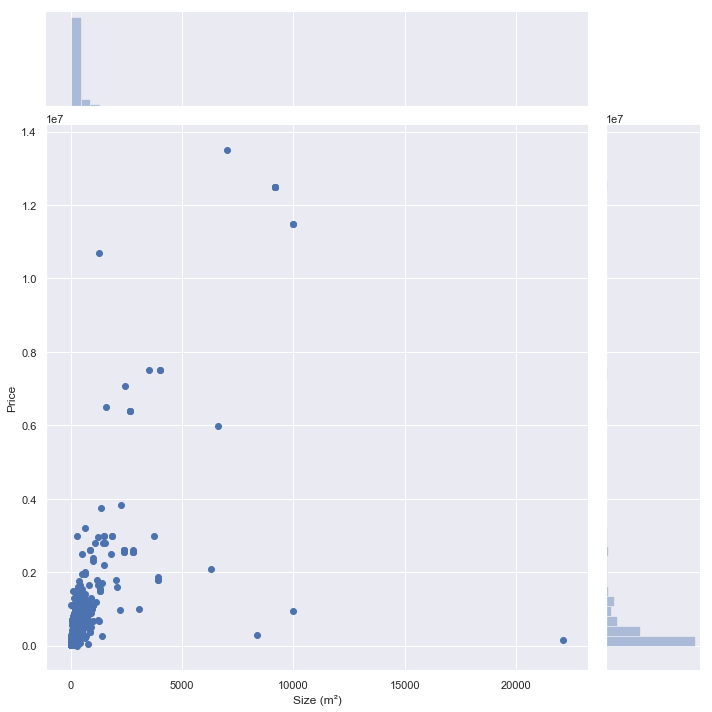

In [11]:
sns.jointplot(x='Size (m²)', y='Price', data=df, size=(10))
plt.show()

In [12]:
#clean big numbers
df = df[df['Size (m²)'] < 600]
df = df[df['Price'] < 400000]
df['Zone']=df['Zone'].str.strip()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


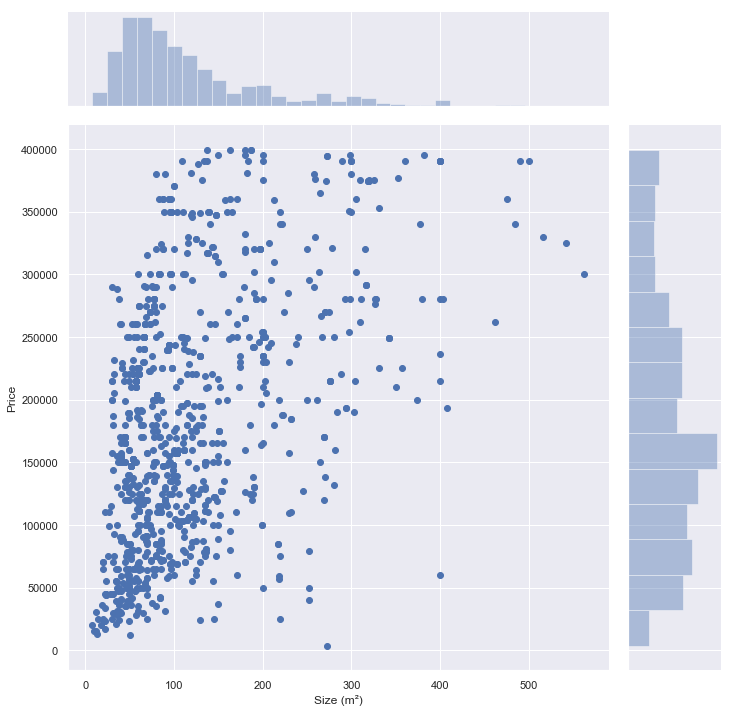

In [13]:
sns.jointplot(x='Size (m²)', y='Price', data=df, size=(10))
plt.show()

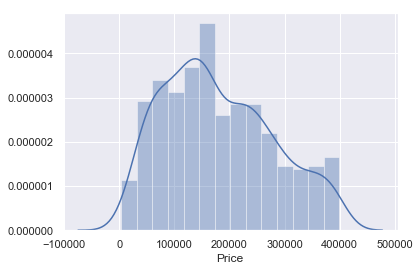

In [14]:
sns.distplot(df['Price'])
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


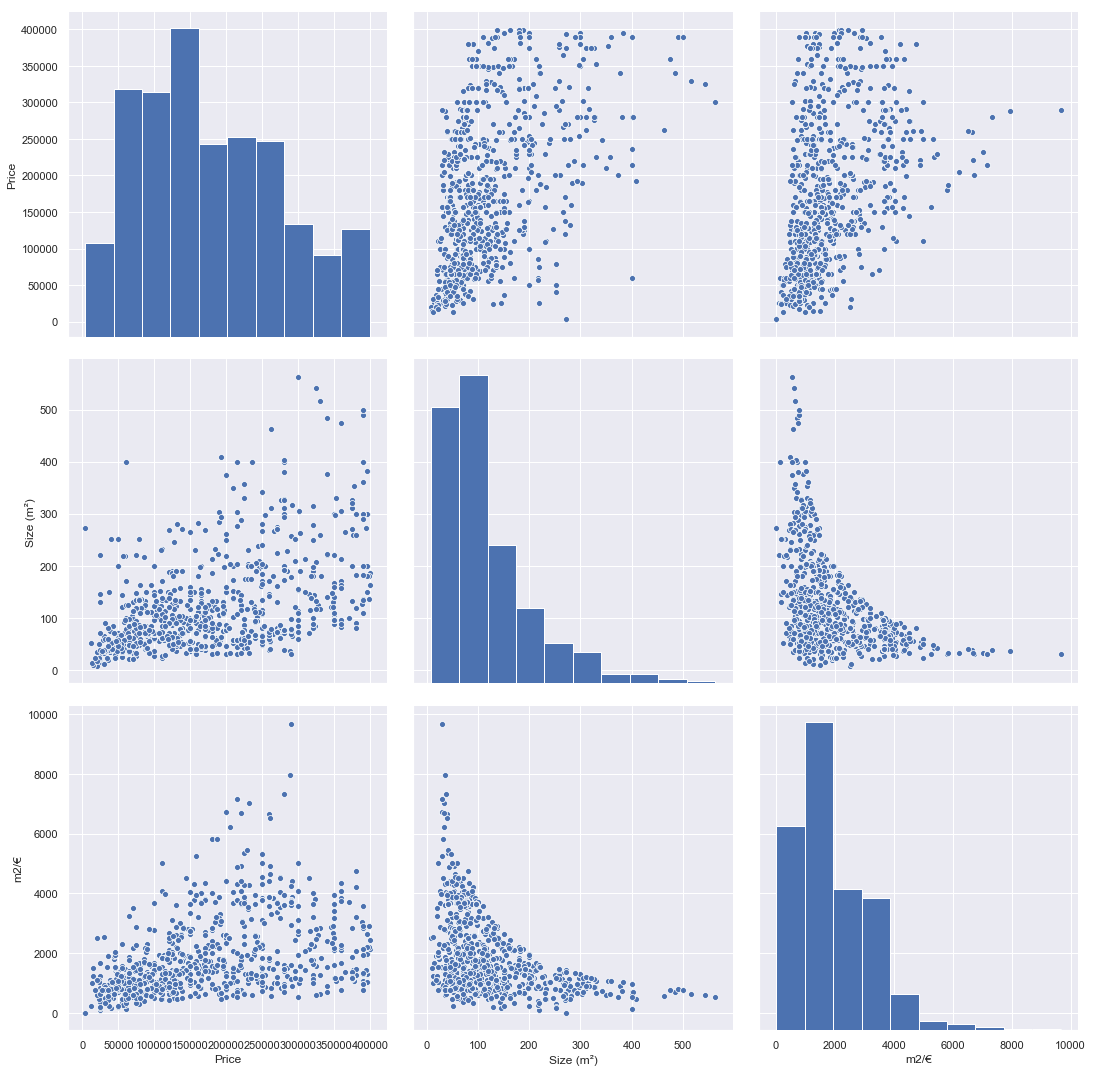

In [15]:
c = ['Price','Size (m²)', 'm2/€']
sns.pairplot(df[c],size=5)
plt.show()